In [2]:
filename = '/exp/dune/app/users/mking/dunesw_v09_82_00d00/ICEBERG_Noise_Ar_39/iceberg_noise/AR_39_sim/Ar39.root'
import uproot
import numpy as np
import matplotlib.pyplot as plt

file = uproot.open(filename)
print(file.keys())

['RootFileDB;1', 'MetaData;1', 'FileIndex;1', 'Parentage;1', 'Events;1', 'EventMetaData;1', 'SubRuns;1', 'SubRunMetaData;1', 'Runs;1', 'RunMetaData;1', 'ResultsTree;1', 'ResultsMetaData;1']


In [3]:
for item in file['Events']:
    print(item)

<TBranchElement 'EventAuxiliary' at 0x7fe7824cea90>
<TBranchElement 'raw::RawDigits_tpcrawdecoder_sig_SinglesGen.' (3 subbranches) at 0x7fe7824db460>
<TBranchElement 'simb::MCTruths_generator__SinglesGen.' (3 subbranches) at 0x7fe7824e3c40>
<TBranchElement 'sim::ParticleAncestryMap_largeant__SinglesGen.' (3 subbranches) at 0x7fe782475430>
<TBranchElement 'simb::MCParticles_largeant__SinglesGen.' (3 subbranches) at 0x7fe78247fbe0>
<TBranchElement 'simb::MCParticlesimb::MCTruthsim::GeneratedParticleInfoart::Assns_largeant__SinglesGen.' (3 subbranches) at 0x7fe782492400>
<TBranchElement 'art::RNGsnapshots_rns__SinglesGen.' (3 subbranches) at 0x7fe78249ea60>
<TBranchElement 'sim::SimEnergyDeposits_largeant_LArG4DetectorServicevolTPCActive_SinglesGen.' (3 subbranches) at 0x7fe782431250>
<TBranchElement 'sim::SimEnergyDeposits_largeant_LArG4DetectorServicevolTPCActiveOuter_SinglesGen.' (3 subbranches) at 0x7fe78243da00>
<TBranchElement 'sim::SimChannels_tpcrawdecoder_simpleSC_SinglesGen.' (3

In [4]:
for item in file['Events/raw::RawDigits_tpcrawdecoder_sig_SinglesGen.']:
    print(item)

<TBranchElement 'raw::RawDigits_tpcrawdecoder_sig_SinglesGen.present' at 0x7fe7824db970>
<TBranchElement 'raw::RawDigits_tpcrawdecoder_sig_SinglesGen.rangeSetID' at 0x7fe7824df3a0>
<TBranchElement 'raw::RawDigits_tpcrawdecoder_sig_SinglesGen.obj' at 0x7fe7824dfd60>


In [5]:
print (file['Events/raw::RawDigits_tpcrawdecoder_sig_SinglesGen./raw::RawDigits_tpcrawdecoder_sig_SinglesGen.obj'])

<TBranchElement 'raw::RawDigits_tpcrawdecoder_sig_SinglesGen.obj' at 0x7fe7824dfd60>


In [6]:
filename = '/exp/dune/app/users/mking/dunesw_v09_82_00d00/ICEBERG_Noise_Ar_39/iceberg_noise/Sim_Validation_04192024/Waveforms.root'
import uproot
import numpy as np
import matplotlib.pyplot as plt

file = uproot.open(filename)
print(file.keys())

['run_1_sub_0_event_1_daq;1']


In [7]:
print(file['run_1_sub_0_event_1_daq;1'])

<TH2F (version 4) at 0x7fe79abd6c40>


In [8]:
H, xedges, yedges = file['run_1_sub_0_event_1_daq;1'].to_numpy()

In [9]:
print(np.shape(H))
print(np.shape(H)[0])
print(np.shape(xedges))
print(np.shape(yedges))

(1280, 2128)
1280
(1281,)
(2129,)


In [10]:
xcenters = (xedges[:-1] + xedges[1:]) / 2
timeticks = yedges[:-1]

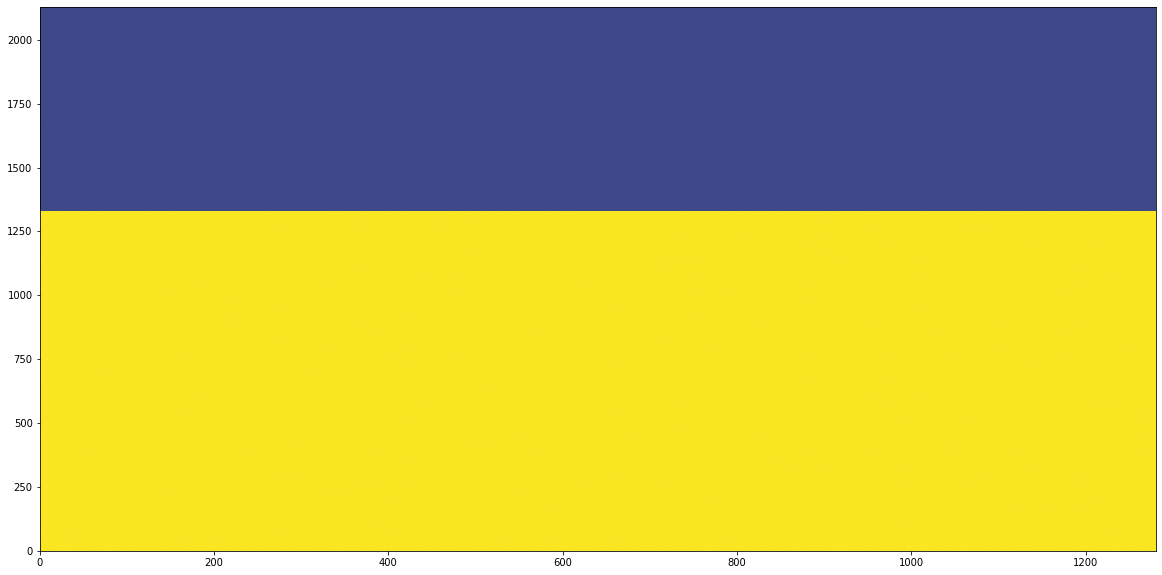

In [6]:
import matplotlib.pyplot as plt

#fig,ax = plt.subplots(1)
#pc = ax.pcolorfast(xedges,yedges,H)
#plt.show()

fig2,ax2 = plt.subplots(1,figsize=(20,10))
pc2 = ax2.pcolorfast(xedges,yedges,H)
#plt.xlim(2080,2105)
#plt.ylim(1140,1220)
plt.show()

2340.5132
14.583272


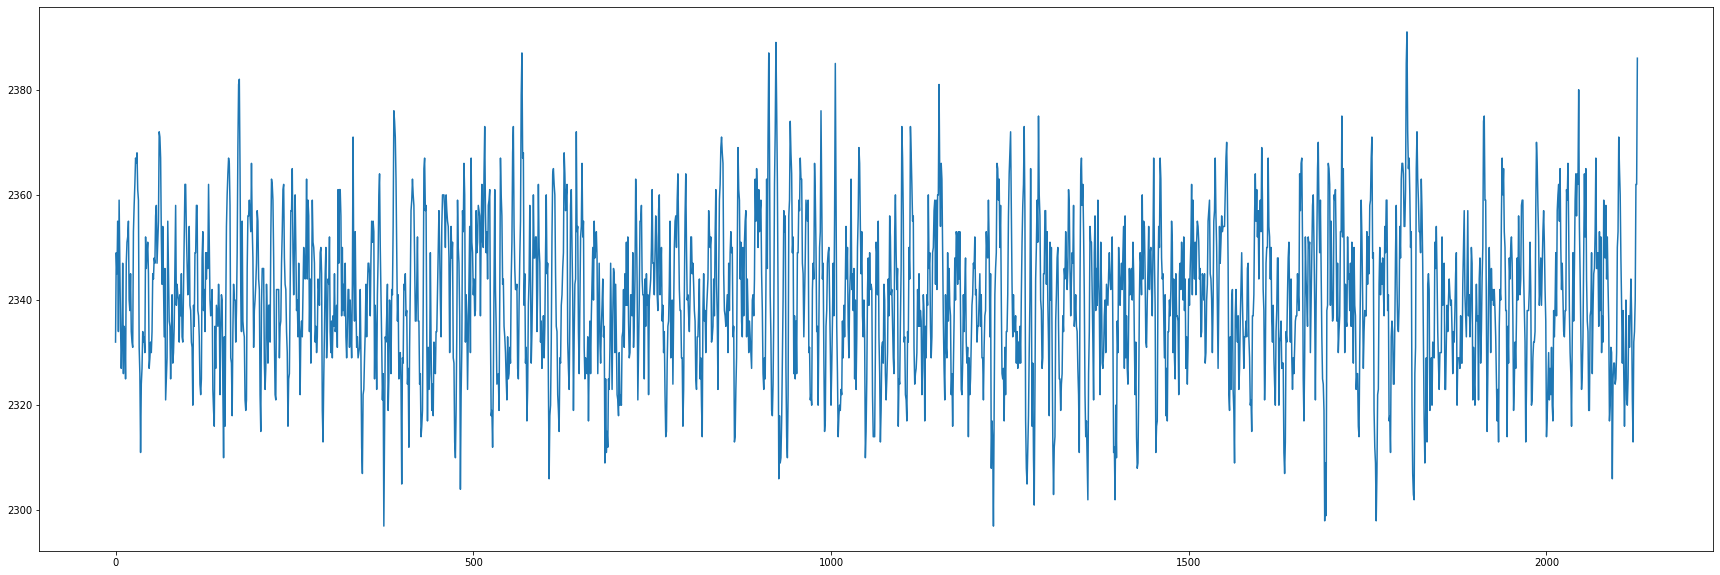

In [9]:
plt.figure(figsize = (30,10))
plt.plot(timeticks,H[1000])
print(np.mean(H[1000]))
print(np.std(H[1000]))

In [11]:
#Baseline subtract
H_subtr = H - np.mean(H[:,0:2128],axis=1)[:,np.newaxis]

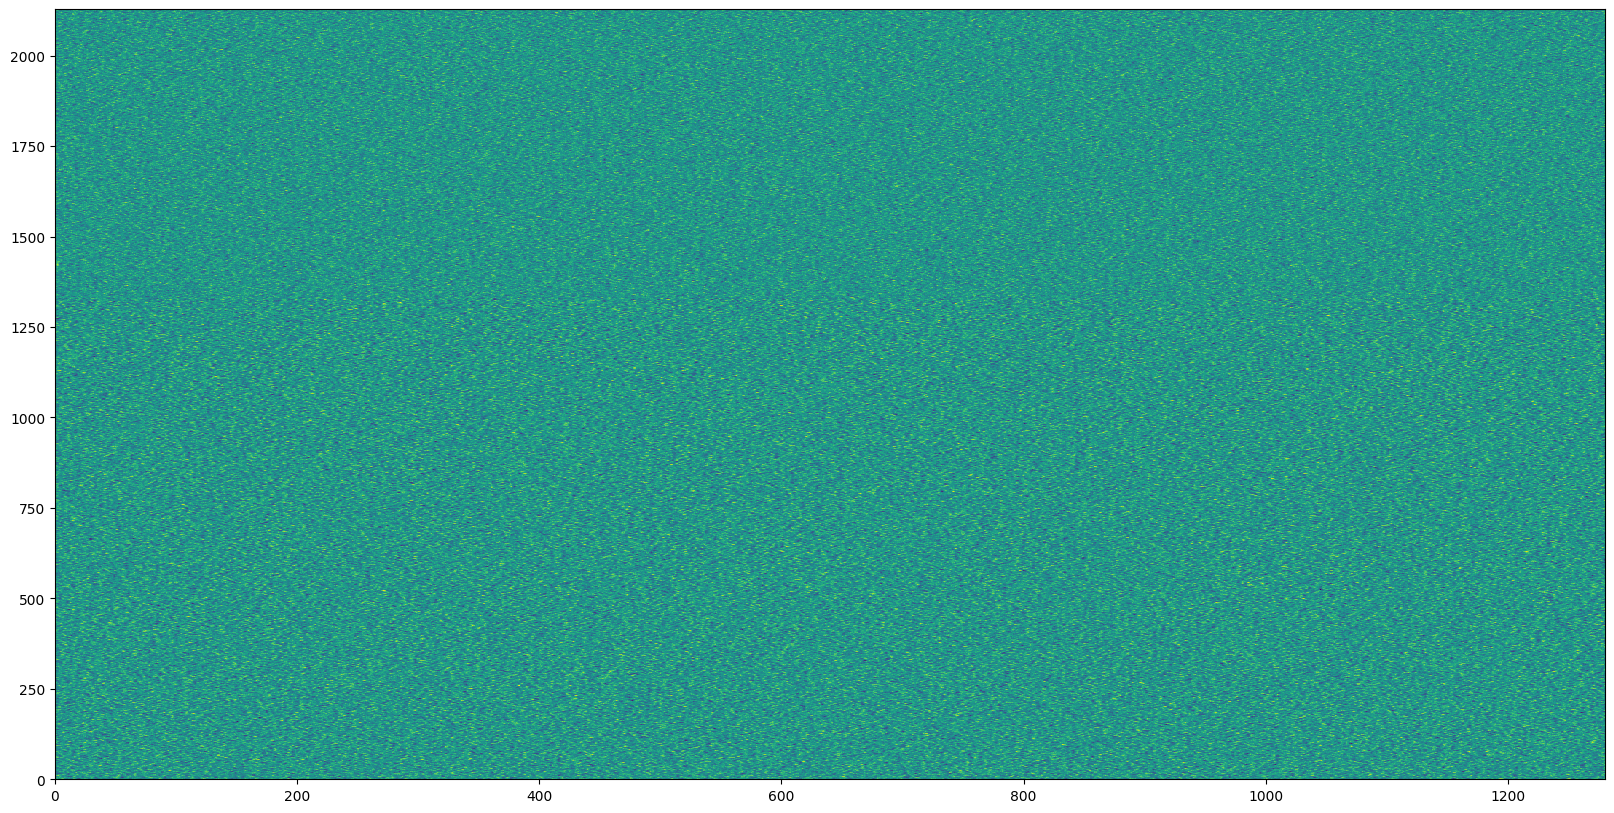

In [12]:
fig2,ax2 = plt.subplots(1,figsize=(20,10))
pc2 = ax2.pcolorfast(xedges,yedges,H_subtr)
#plt.xlim(2080,2105)
#plt.ylim(1140,1220)
plt.show()

-2.5699013e-05
14.583272


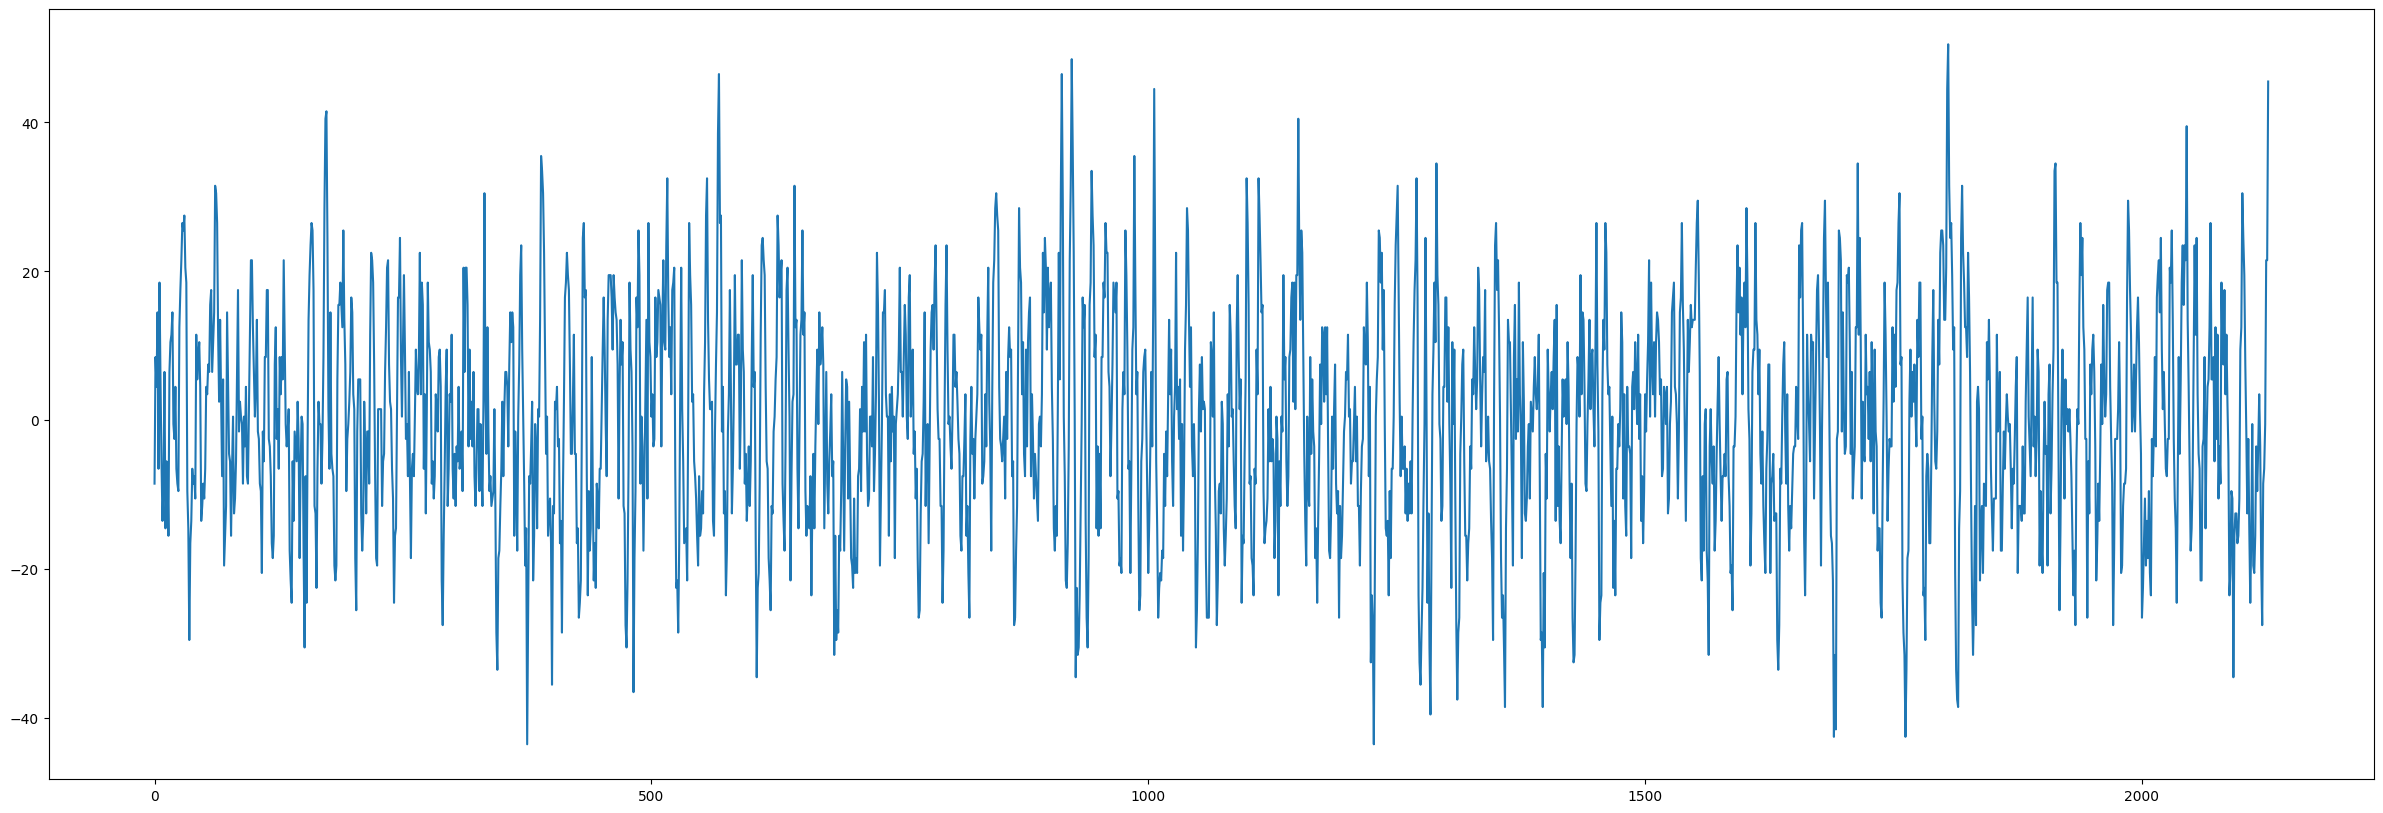

In [13]:
plt.figure(figsize = (30,10))
plt.plot(timeticks,H_subtr[1000])
print(np.mean(H_subtr[1000]))
print(np.std(H_subtr[1000]))

In [2]:
## Validate the FFTs
from Analyzer import Analyzer
import numpy as np
H, xedges, yedges, xcenters, timeticks, key = Analyzer.LoadWaveformFile(Waveform_File_Path='Waveforms_Sim_50.root')
H_subtr = H - np.mean(H[:,0:2128],axis=1)[:,np.newaxis]

In [3]:
import numpy as np

In [3]:
print(np.shape(H))

(1280, 2128)


In [4]:
FFT = Analyzer.FFTEventFast(H_subtr,key)

In [7]:
print(np.shape(FFT))
print(np.shape(FFT[0]))
print(np.shape(FFT[:,0]))

(1280, 1065)
(1065,)
(1280,)


In [1]:
from Analyzer import Analyzer
import numpy as np
AverageFFT = Analyzer.AverageFFT(OutputFFT_File_Path = 'AverageFFT.npz', Waveform_File_Path='Waveforms_Sim_50.root',nEvents = 50)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [2]:
print(np.shape(AverageFFT))

(1280, 1065)


In [2]:
import numpy as np
AverageFFT = np.load('AverageFFT.npz')['FFT']

(1281,)
(1066,)
(1280, 1065)


/exp/dune/app/users/mking/dunesw_v09_82_00d00/ICEBERG_Noise_Ar_39/iceberg_noise/Sim_Validation_04192024/Analyzer.py:200: RuntimeWarning: divide by zero encountered in log10
  ax.pcolormesh(channel_edges,freq_edges,np.log10(FFT).T,cmap = cmap,shading='flat',vmin = -1, vmax = 7) #default -1,7
/exp/dune/app/users/mking/dunesw_v09_82_00d00/ICEBERG_Noise_Ar_39/iceberg_noise/Sim_Validation_04192024/Analyzer.py:201: RuntimeWarning: divide by zero encountered in log10
  fig.colorbar(ax.pcolormesh(channel_edges,freq_edges,np.log10(FFT).T,cmap = cmap,shading='flat',vmin = -1, vmax = 7) ) #default -1,7


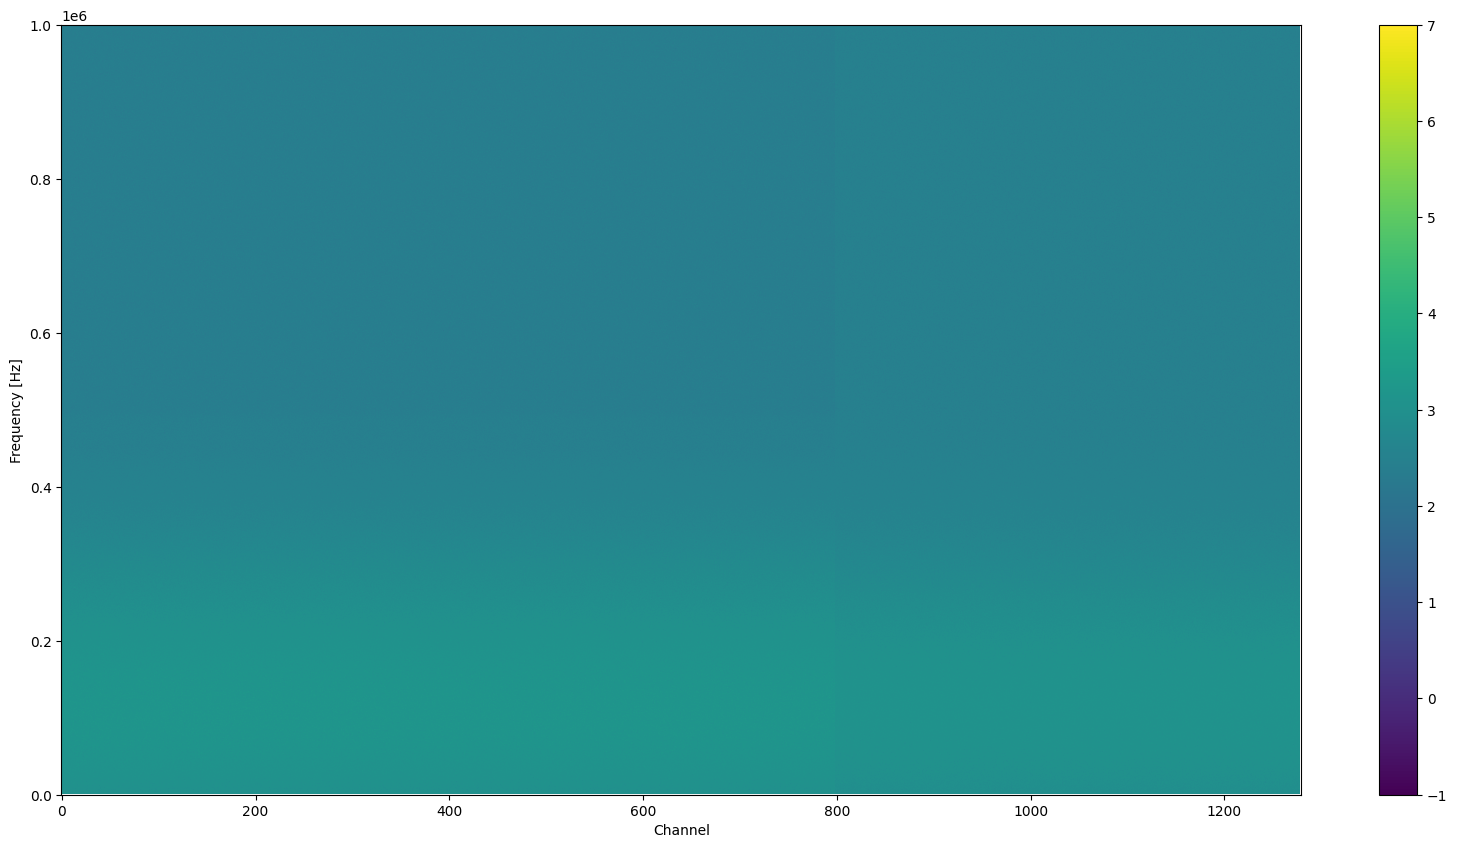

In [4]:
from Analyzer import Analyzer
Analyzer.Plot2DFFT(AverageFFT)

/exp/dune/app/users/mking/dunesw_v09_82_00d00/ICEBERG_Noise_Ar_39/iceberg_noise/Sim_Validation_04192024/plotter.py:115: RuntimeWarning: divide by zero encountered in log10
  ax2[tpc][plane].pcolormesh(freq,range(plotter.maxwires),np.log10(Sorted_PSD[tpc][plane]),cmap = cmap,shading='gouraud',vmin = 1, vmax = 4) #default -14,-5
/exp/dune/app/users/mking/dunesw_v09_82_00d00/ICEBERG_Noise_Ar_39/iceberg_noise/Sim_Validation_04192024/plotter.py:116: RuntimeWarning: divide by zero encountered in log10
  fig2.colorbar(ax2[tpc][plane].pcolormesh(freq,range(plotter.maxwires),np.log10(Sorted_PSD[tpc][plane]),cmap = cmap,shading='gouraud',vmin = 1, vmax = 4)) #default -14,-5


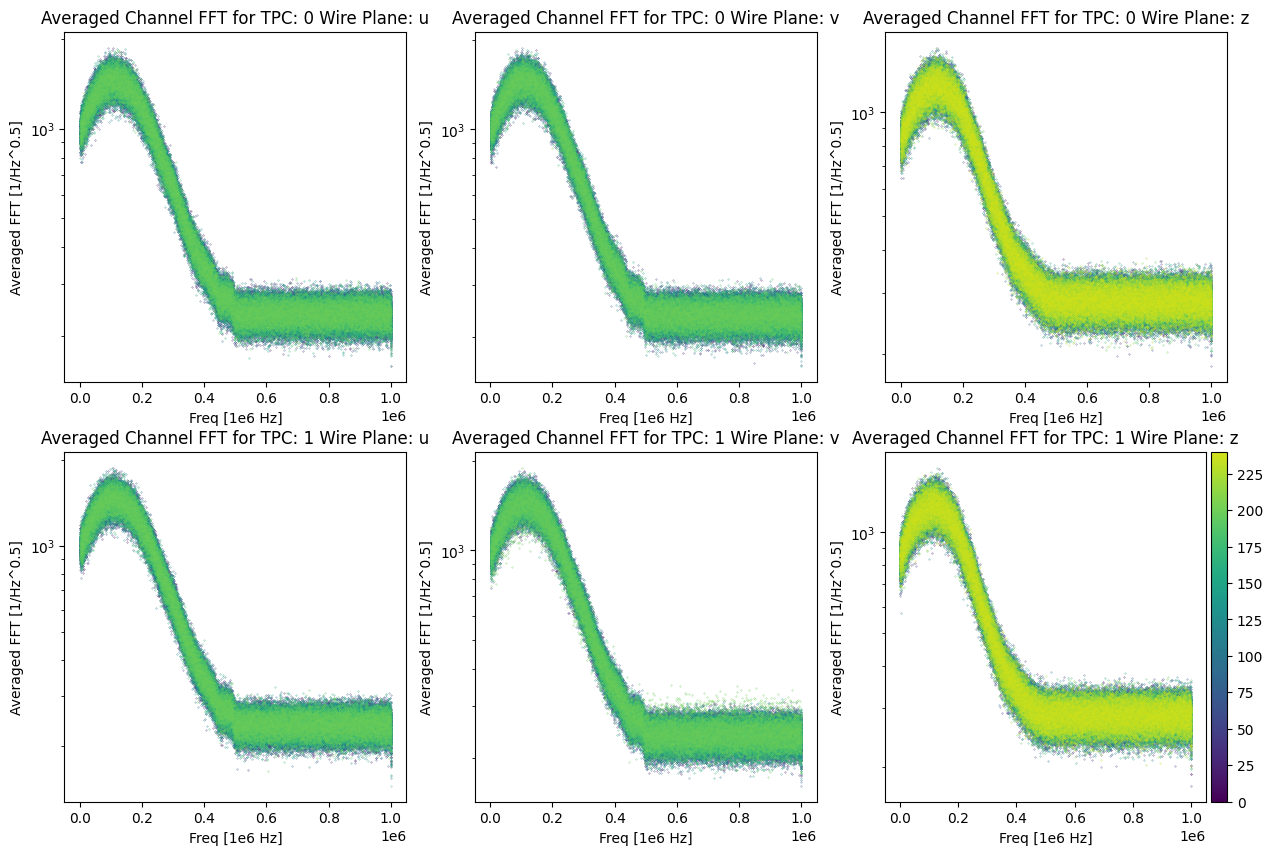

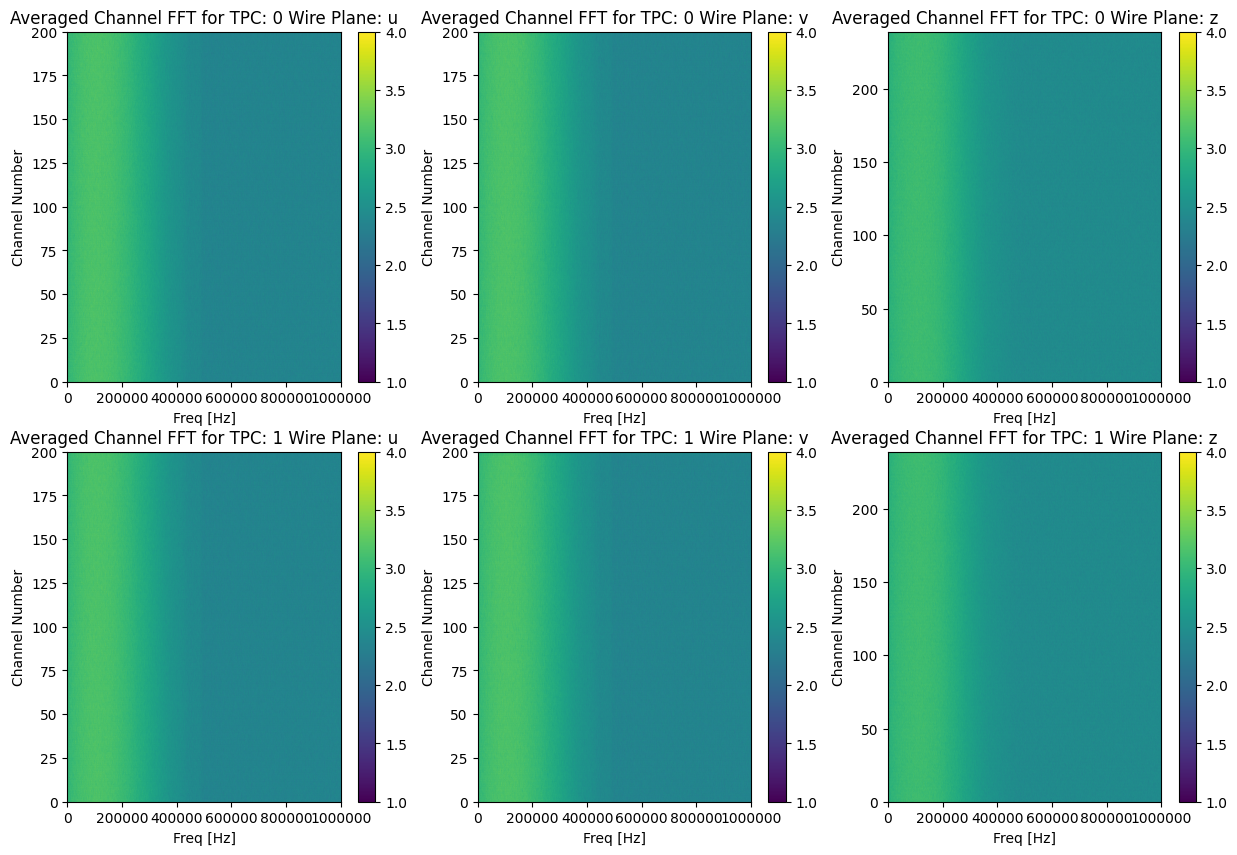

In [5]:
from plotter import plotter
plotter.HistAvgPSDbyPlane(AverageFFT)

In [6]:
## Now for data...
from Analyzer import Analyzer
import numpy as np
AverageFFT = Analyzer.AverageFFT(OutputFFT_File_Path = 'AverageFFT.npz', Waveform_File_Path='Waveforms_Data.root',nEvents = 50)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [1]:
import numpy as np
AverageFFT = np.load('AverageFFT.npz')['FFT']

/exp/dune/app/users/mking/dunesw_v09_82_00d00/ICEBERG_Noise_Ar_39/iceberg_noise/Sim_Validation_04192024/plotter.py:115: RuntimeWarning: divide by zero encountered in log10
  ax2[tpc][plane].pcolormesh(freq,range(plotter.maxwires),np.log10(Sorted_PSD[tpc][plane]),cmap = cmap,shading='gouraud',vmin = 3.5, vmax = 4.5) #default -14,-5
/exp/dune/app/users/mking/dunesw_v09_82_00d00/ICEBERG_Noise_Ar_39/iceberg_noise/Sim_Validation_04192024/plotter.py:116: RuntimeWarning: divide by zero encountered in log10
  fig2.colorbar(ax2[tpc][plane].pcolormesh(freq,range(plotter.maxwires),np.log10(Sorted_PSD[tpc][plane]),cmap = cmap,shading='gouraud',vmin = 3.5, vmax = 4.5)) #default -14,-5


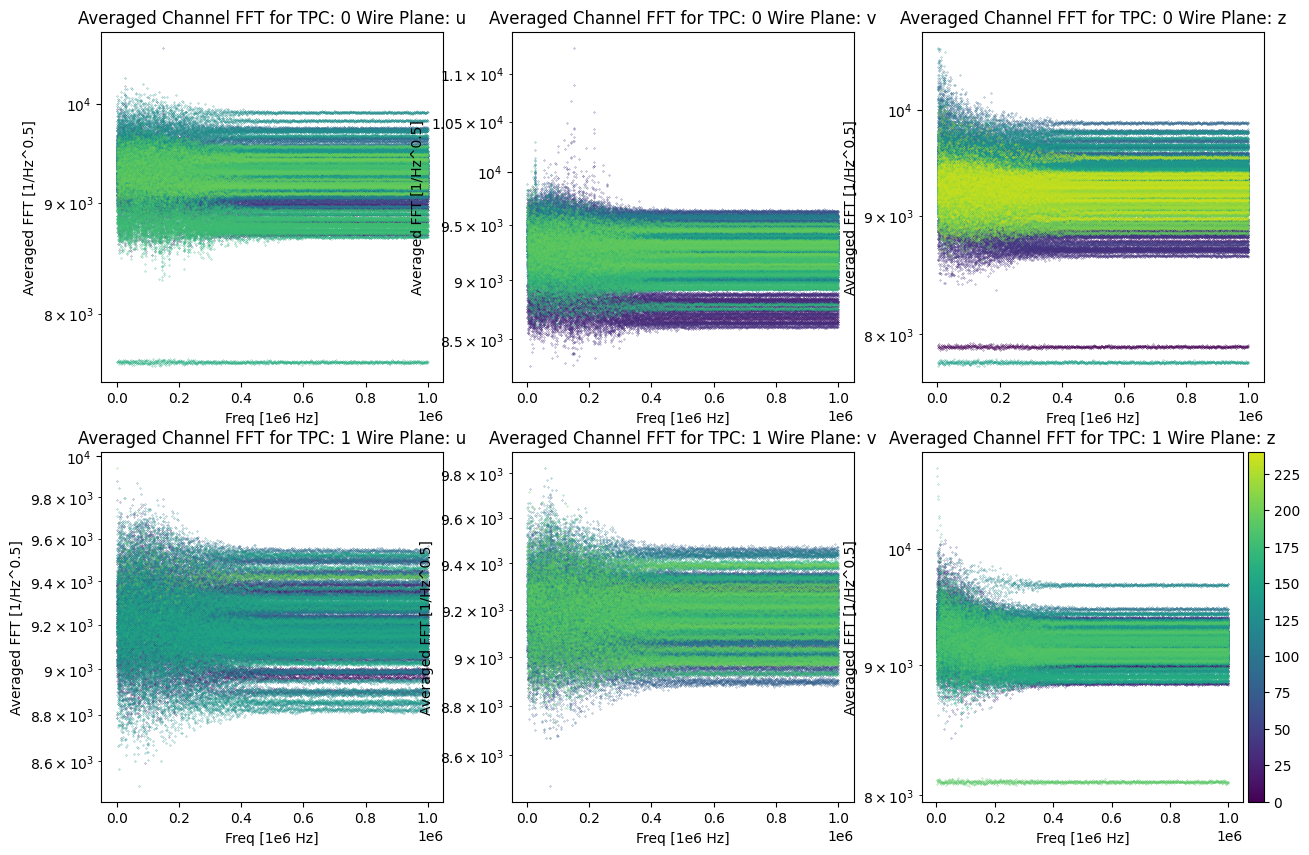

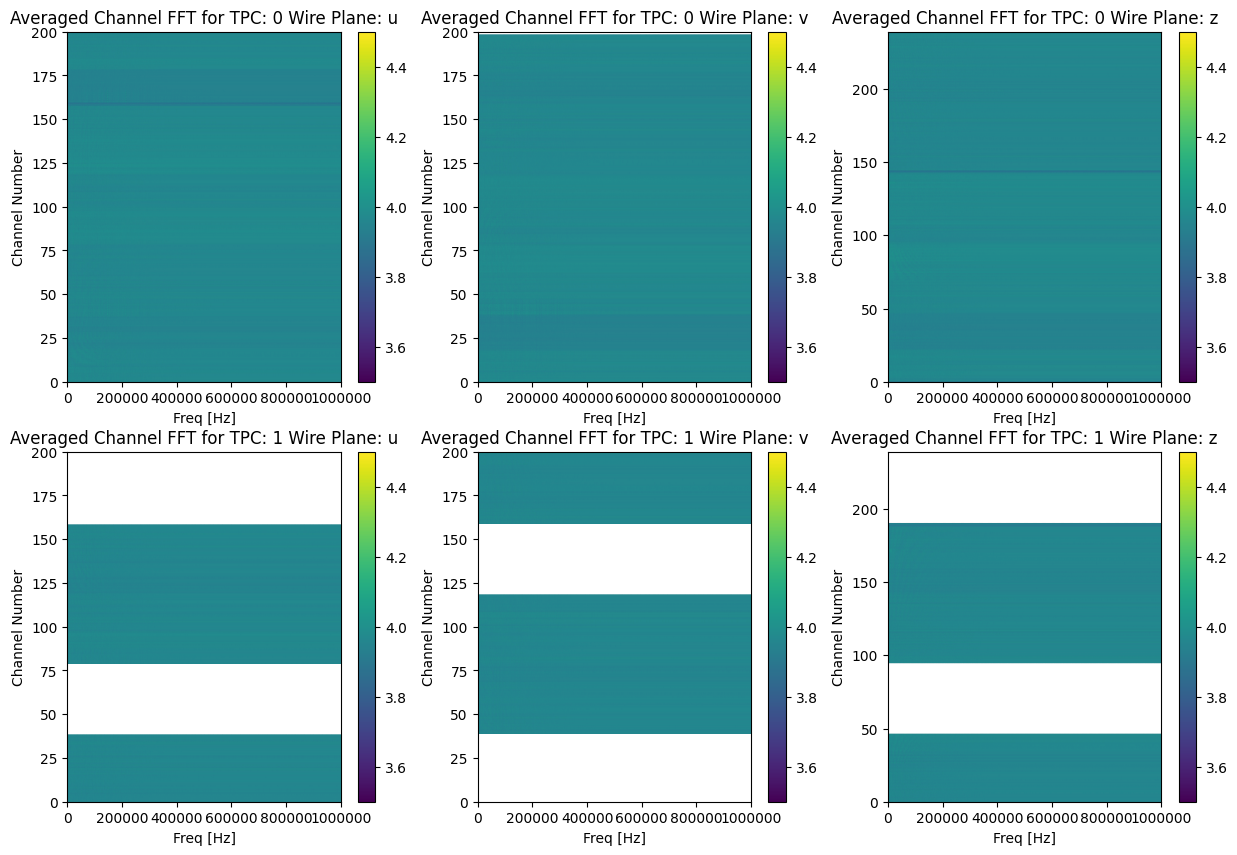

In [2]:
from plotter import plotter
plotter.HistAvgPSDbyPlane(AverageFFT)

In [3]:
#Plots to compare data and simulation
DataAverageFFT = np.load('./Data_50_Plots/AverageFFT_Data.npz')['FFT']
SimAverageFFT = np.load('./Sim_50_Plots/AverageFFT.npz')['FFT']

FileNotFoundError: [Errno 2] No such file or directory: 'Data_50_Plots/AverageFFT_Data.npz'